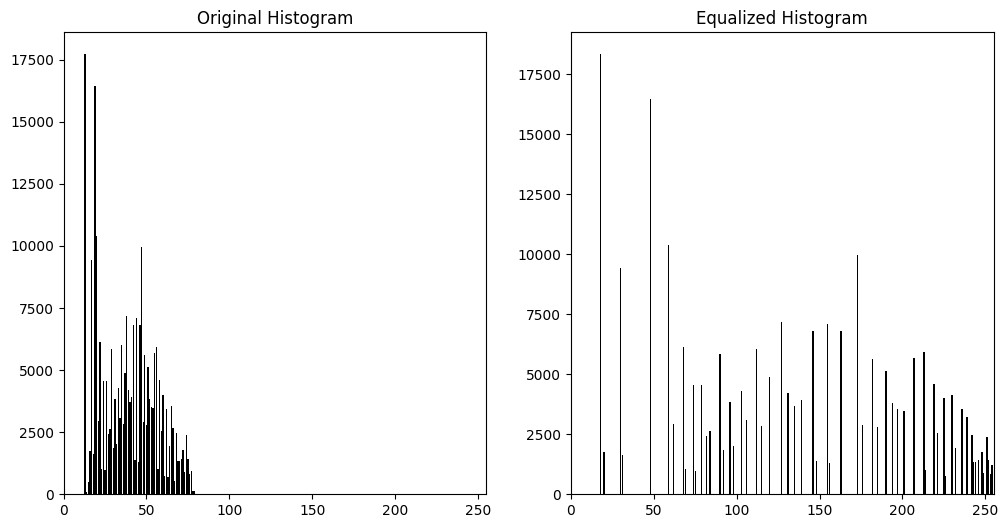

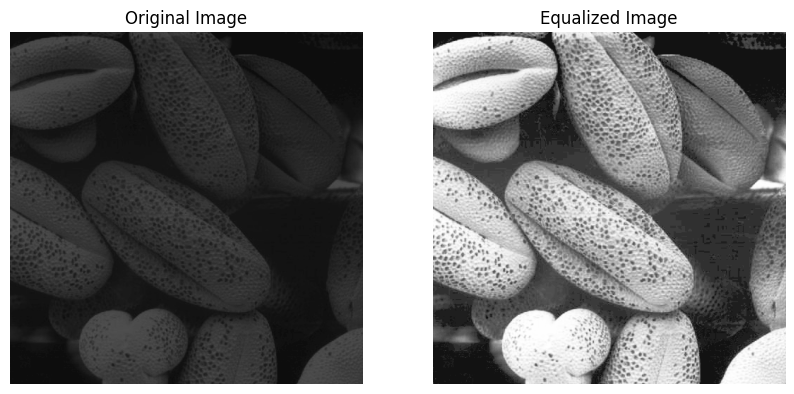

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def compute_histogram(image):
    hist = np.zeros(256, dtype=int)
    for value in image.ravel():
        hist[value] += 1
    return hist

def histogram_equalization(image):
    original_hist = compute_histogram(image)
    cdf = np.cumsum(original_hist)
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    cdf_normalized = cdf_normalized.astype(np.uint8)
    equalized_image = cdf_normalized[image]
    equalized_hist = compute_histogram(equalized_image)
    return equalized_image, original_hist, equalized_hist


# Load the image
image = cv2.imread("E:/Github_Projects/Intensity-Transformations-and-Neighborhood-Filtering/a1images/shells.tif", cv2.IMREAD_GRAYSCALE)
assert image is not None

# Apply histogram equalization
equalized_image, original_hist, equalized_hist = histogram_equalization(image)

# Plot the original and equalized histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(np.arange(256), original_hist, color='black')
plt.title('Original Histogram')
plt.xlim([0, 255])

plt.subplot(1, 2, 2)
plt.bar(np.arange(256), equalized_hist, color='black')
plt.title('Equalized Histogram')
plt.xlim([0, 255])
plt.show()

# Display the original and equalized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray',vmin=0, vmax=255)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray',vmin=0, vmax=255)
plt.title('Equalized Image')
plt.axis('off')

plt.show()
